<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/Oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: Use stock indicators with machine learning to try to predict the direction of a stock price: 
#1 means the stock price goes up 
#0 means the stock price goes down or stays the same

In [25]:
#Import the libraries
import numpy as np
import pandas as pd
import pandas_datareader as web
import pandas_datareader as pdr
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
# Get the stock quote
df = web.DataReader('EC', data_source='yahoo',start='2020-01-01', end='2021-03-07')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,20.410000,20.150000,20.15,20.309999,264900.0,18.582394
2020-01-03,20.700001,20.360001,20.59,20.480000,682700.0,18.737932
2020-01-06,20.530001,20.280001,20.50,20.400000,397200.0,18.664738
2020-01-07,20.580000,20.270000,20.32,20.500000,559200.0,18.756231
2020-01-08,20.540001,20.200001,20.26,20.340000,1498200.0,18.609842
...,...,...,...,...,...,...
2021-03-01,12.700000,12.390000,12.50,12.430000,771600.0,12.430000
2021-03-02,12.530000,12.260000,12.41,12.340000,792300.0,12.340000
2021-03-03,12.470000,12.270000,12.37,12.340000,1245800.0,12.340000


In [31]:
df = pdr.get_data_fred('DCOILBRENTEU')
df.columns = ['Close']
df

,Close
DATE,
2016-03-09,40.26
2016-03-10,38.63
2016-03-11,39.41
2016-03-14,38.06
2016-03-15,37.49
...,...
2021-02-23,65.16
2021-02-24,66.85
2021-02-25,66.69


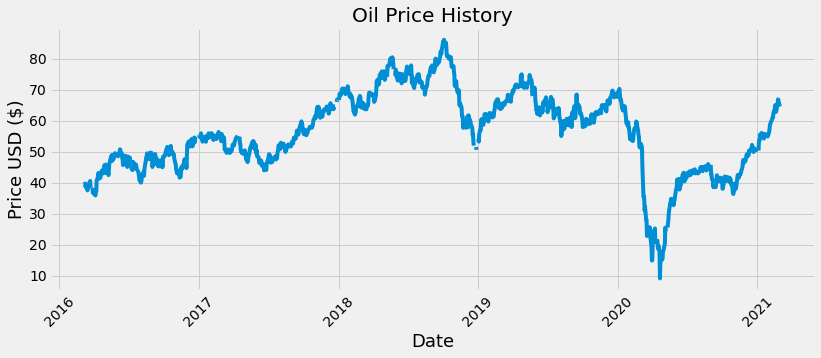

In [32]:
# Visually Show The Stock Price(s)
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df['Close'],  label='Close')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45) 
plt.title('Oil Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

In [33]:
# Calculate the three moving averages
#Calculate ther Short / Fast exponential moving average
ShortEMA = df.Close.ewm(span=5, adjust=False).mean()
# Calculate the Middle / Medium exponential moving average
MiddleEMA = df.Close.ewm(span=21, adjust=False).mean()
# Calculate the Long / Slow exponential moving average
LongEMA = df.Close.ewm(span=63, adjust=False).mean()

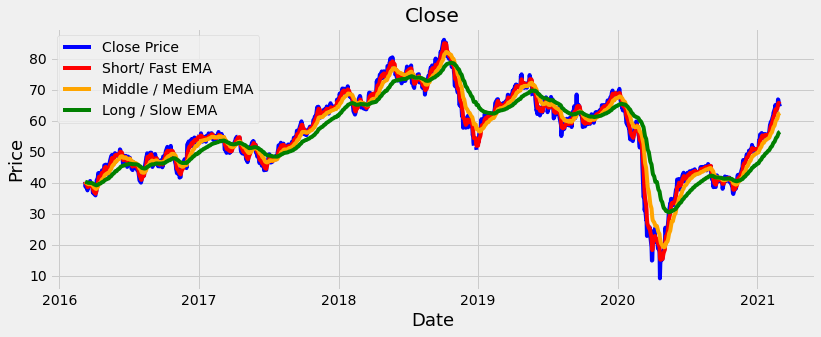

In [34]:
# Visually show the Adj Close 
plt.figure(figsize=(12.2,4.5))
plt.title('Close')
plt.plot(df['Close'], label = 'Close Price', color = 'blue')
plt.plot(ShortEMA, label = 'Short/ Fast EMA', color = 'red')
plt.plot(MiddleEMA, label = 'Middle / Medium EMA', color = 'orange')
plt.plot(LongEMA, label = 'Long / Slow EMA', color = 'green')
plt.legend()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [35]:
# Add the EMV to the data set
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA
df

,Close,Short,Middle,Long
DATE,,,,
2016-03-09,40.26,40.260000,40.260000,40.260000
2016-03-10,38.63,39.716667,40.111818,40.209063
2016-03-11,39.41,39.614444,40.048017,40.184092
2016-03-14,38.06,39.096296,39.867288,40.117714
2016-03-15,37.49,38.560864,39.651171,40.035598
...,...,...,...,...
2021-02-23,65.16,64.269162,60.974596,55.109981
2021-02-24,66.85,65.129441,61.508724,55.476856
2021-02-25,66.69,65.649627,61.979749,55.827267


In [37]:
#Create the function to buy and sell the stock
def buy_sell_function(data):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  return (buy_list, sell_list)

In [38]:
#Add the buy and sell signals to the data set
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

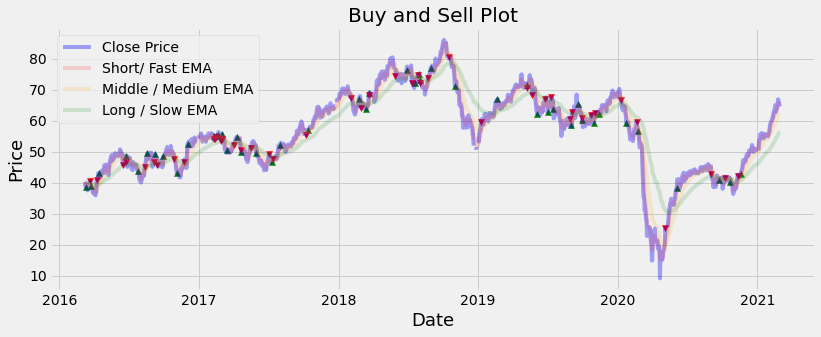

In [39]:
#Visually show the stock buy 
# Visually show the Adj Close 
plt.figure(figsize=(12.2,4.5))
plt.title('Buy and Sell Plot')
plt.plot(df['Close'], label = 'Close Price', color = 'blue', alpha = 0.35)
plt.plot(ShortEMA, label = 'Short/ Fast EMA', color = 'red', alpha = 0.15)
plt.plot(MiddleEMA, label = 'Middle / Medium EMA', color = 'orange', alpha = 0.15)
plt.plot(LongEMA, label = 'Long / Slow EMA', color = 'green', alpha = 0.15)
plt.scatter(df.index, df['Buy'], color='green', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color='red', marker = 'v', alpha = 1)
plt.legend()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()